In [1]:
# Enable code formatting using external plugin: nb_black.
%reload_ext nb_black

<IPython.core.display.Javascript object>

<h1>
<font color="red">Incomplete Code !!!</font>
</h1>

# Squared Error Cost Function

### Objective

Implement cost function for _Multinomial Logistic Regression_ based on **Squared Error** technique.

<a id="#[1]-Setup"></a>
# [1] Setup

### Import and configure required libraries

In [2]:
# Data manipulation libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from prettytable import PrettyTable


# Library versions used in below EDA.
print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Plotly version:", plotly.__version__)

# Configure NumPy.
# Set `Line width` to Maximum 130 characters in the output, post which it will continue in next line.
np.set_printoptions(linewidth=130)

# Configure Pandas.
# Set display width to maximum 130 characters in the output, post which it will continue in next line.
pd.options.display.width = 130

# Configure Seaborn.
sns.set_style("whitegrid")  # Set white background with grid.
sns.set_palette("deep")  # Set color palette.
sns.set_context("paper", font_scale=1.5)  # Set font to scale 1.5 more than normal.

NumPy version: 1.21.5
Pandas version: 1.4.2
Matplotlib version: 3.5.1
Seaborn version: 0.11.2
Plotly version: 5.8.0


<IPython.core.display.Javascript object>

#### Common functions

In [3]:
def get_shape(np_array):
    if not isinstance(np_array, np.ndarray):
        raise ValueError(f"Received {type(np_array)} instead of numpy array.")

    if np_array.size == 0:
        raise ValueError(f"Received empty numpy array.")

    shape = list(np_array.shape)
    return (shape.pop(), None) if len(shape) == 1 else (shape[0], shape[1])


ENABLE_LOG = False


def text(*args):
    """
    Function to print() input string when logging is enabled.
    """
    if ENABLE_LOG is True:
        print(*args)


def title(title_str, padding=[1, 1], line_style="="):
    """
    Function to print() input string with some styles, when logging is enabled.
    """
    if ENABLE_LOG is True:
        pad_top, pad_bot = padding
        pt = "\n" * pad_top
        pb = "\n" * pad_bot
        print(pt + title_str + "\n" + line_style * len(title_str) + pb)

<IPython.core.display.Javascript object>

#### Load data-points from the `.csv` file

In [4]:
biv_df = pd.read_csv("../input/synthetic-datasets/bivariate_data_points.csv")
biv_df.head()

,X1,X2,CL
0,144,75,0
1,169,185,1
2,227,224,1
3,103,25,0
4,241,295,1


<IPython.core.display.Javascript object>

# [2] Data Analysis

In [5]:
rows, cols = biv_df.shape

print("Rows:", rows)
print("Columns:", cols)

Rows: 500
Columns: 3


<IPython.core.display.Javascript object>

In [6]:
biv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      500 non-null    int64
 1   X2      500 non-null    int64
 2   CL      500 non-null    int64
dtypes: int64(3)
memory usage: 11.8 KB


<IPython.core.display.Javascript object>

In [7]:
biv_df.apply(max)

X1    291
X2    322
CL      1
dtype: int64

<IPython.core.display.Javascript object>

#### Plot attributes

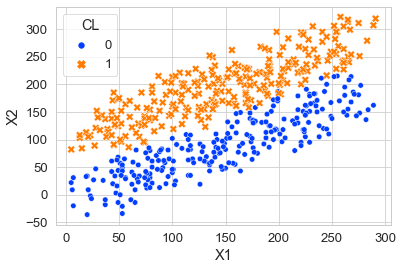

<IPython.core.display.Javascript object>

In [8]:
sns.scatterplot(
    data=biv_df,
    x="X1",
    y="X2",
    hue="CL",
    palette="bright",
    style="CL",
    size="CL",
    markers=["o", "X"],
    sizes=(60, 30),
)
plt.show()

# [3] Implementation

### Sample logic

Compute Cost function on a multivariate dataset using **matrix multiplication technique**.

In [9]:
# Theta
theta = np.array([-10, 1, 1])
X = np.array(
    [
        [5, 2],
        [4, 1],
        [3, 4],
        [2, 3],
        [1, 5],
        [6, 9],
        [7, 10],
        [8, 6],
        [9, 8],
        [10, 7],
    ]
)
Y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

m, n = get_shape(X)
X_0 = np.ones((m, 1), X.dtype)
X = np.hstack((X_0, X))

print("Rows:", m, "Columns:", n)
print("X shape:", get_shape(X))
print("Y shape:", get_shape(Y))
print("θ shape:", get_shape(theta))

Rows: 10 Columns: 2
X shape: (10, 3)
Y shape: (10, None)
θ shape: (3, None)


<IPython.core.display.Javascript object>

In [10]:
# Model
Z = np.matmul(theta, X.transpose())
h = 1 / (1 + np.exp(-Z))

# h = (h >= 0.5).astype(int)  # Predicted Y
h = np.round(h, 4)
h = h.reshape((1, m))

print("Hypothesis values:", h.tolist())
print("Hypothesis Shape:", get_shape(h))

Hypothesis values: [[0.0474, 0.0067, 0.0474, 0.0067, 0.018, 0.9933, 0.9991, 0.982, 0.9991, 0.9991]]
Hypothesis Shape: (1, 10)


<IPython.core.display.Javascript object>

In [11]:
# p_cls = -1 * np.matmul(np.log(h), Y)
# n_cls = -1 * np.matmul(np.log(1 - h), (1 - Y))

p_cls = np.matmul(np.log(h), Y)
print("P class:", p_cls)
print("P class shape:", get_shape(p_cls))

n_cls = np.matmul(np.log(1 - h), (1 - Y))
print("N class:", n_cls)
print("N class shape:", get_shape(n_cls))

cost = (-1 / m) * (p_cls + n_cls)
print("Cost:", cost.item())

P class: [-0.02758773]
P class shape: (1, None)
N class: [-0.12872944]
N class shape: (1, None)
Cost: 0.015631717549806932


<IPython.core.display.Javascript object>

### Final implementation

In [12]:
def cost_function(X, Y, theta):
    """
    Function to compute Squared Error cost function.
    """
    m, n = get_shape(X)
    # m: Total number for records or data-points
    # n: Total number for input-variables or features.

    if not n:
        # Reshape NumPy array to vector.
        text("Reshaping NumPy array, univariate feature X, to vector.")
        X = X.reshape((m, 1))

    # Dummy feature x0 for y-intercept or theta-zero.
    X_0 = np.ones((m, 1), X.dtype)

    # Horizontally append x0 to input feature.
    X = np.hstack((X_0, X))

    text("X shape:", get_shape(X))
    text("Y shape:", get_shape(Y))
    text("θ shape:", get_shape(theta))

    # Calculate hypothesis or Model.
    # y = t0*x0 + t1*x1 + t2*x2 + ... + tn*xn
    Z = np.matmul(theta, X.transpose())
    hypothesis = 1 / (1 + np.exp(-Z))

    h = hypothesis.reshape((1, m))
    p_cls = np.matmul(np.log(h), Y)
    n_cls = np.matmul(np.log(1 - h), (1 - Y))
    cost = (-1 / m) * (p_cls + n_cls)

    return np.round(cost, 6).item()

<IPython.core.display.Javascript object>

# [4] Testing

Testing Squared Error cost function using univariate dataset.

In [13]:
ENABLE_LOG = True

x_vals = biv_df[["X1", "X2"]].values
y_vals = biv_df["CL"].values
theta = np.array([0.05, 0.05, 0.05])

cost = cost_function(x_vals, y_vals, theta)
print("\nCost:", cost)

X shape: (500, 3)
Y shape: (500, None)
θ shape: (3, None)

Cost: 5.945279


<IPython.core.display.Javascript object>

## θ<sub>1</sub> vs J(θ<sub>0</sub>, θ<sub>1</sub>)

Plot Cost value for various θ<sub>1</sub> values.

In [14]:
np.arange(0.01, 0.2, 0.005)

array([0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 , 0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 ,
       0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 , 0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195])

<IPython.core.display.Javascript object>

C:\Users\dheem\AppData\Local\Temp/ipykernel_21656/2544472669.py:31: RuntimeWarning: divide by zero encountered in log
  n_cls = np.matmul(np.log(1 - h), (1 - Y))
C:\Users\dheem\AppData\Local\Temp/ipykernel_21656/2544472669.py:31: RuntimeWarning: invalid value encountered in matmul
  n_cls = np.matmul(np.log(1 - h), (1 - Y))


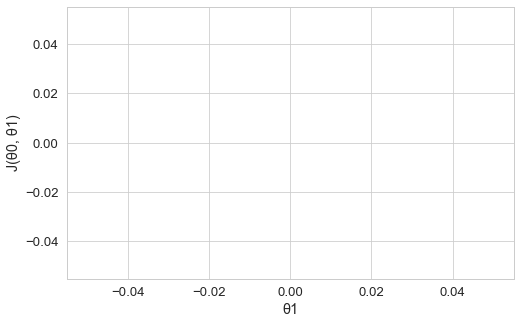

<IPython.core.display.Javascript object>

In [15]:
ENABLE_LOG = False

x_vals = biv_df[["X1", "X2"]].values
y_vals = biv_df["CL"].values
theta_1 = -5
theta_2 = 8
theta_0s = np.arange(0.01, 0.2, 0.005)

J = []
for theta_0 in theta_0s:
    theta = np.array([theta_0, theta_1, theta_2])
    cost = cost_function(x_vals, y_vals, theta)
    J.append(cost)

plt.figure(figsize=(8, 5))

sns.scatterplot(x=theta_0s, y=J)
plt.xlabel("θ1")
plt.ylabel("J(θ0, θ1)")

plt.show()